## MVP Trends Analysis: Comparing Top 5 Players Over the Years

Are MVP Winners changing over time, or do certain players consistently appear at the top?

Which player has had the most MVP's throughout the years? Which team? 

Why has these players won MVP compared to the other Top 4 players? 

Does the MVP winner throughout the years have a better or worst team?

Does the MVP winner have a better team than the other Top 4 players?

In [550]:
import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt

In [551]:
df = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/advanced_stats/merge2000-2024.csv")

df

,Year,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Player-additional
0,2022-2023,Mikal Bridges,26.0,2TM,SG,83.0,83.0,2963.0,16.8,0.587,...,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8,NaN,bridgmi01
1,2022-2023,Mikal Bridges,26.0,PHO,SF,56.0,56.0,2040.0,14.8,0.574,...,2.7,2.2,4.9,0.116,0.4,0.6,1.0,1.6,NaN,bridgmi01
2,2022-2023,Mikal Bridges,26.0,BRK,SG,27.0,27.0,923.0,21.3,0.607,...,1.7,0.8,2.5,0.133,4.0,-0.8,3.3,1.2,NaN,bridgmi01
3,2022-2023,Anthony Edwards,21.0,MIN,SG,79.0,79.0,2842.0,17.4,0.564,...,0.2,3.6,3.8,0.064,1.0,0.0,1.0,2.1,AS,edwaran01
4,2022-2023,Zach LaVine,27.0,CHI,SG,77.0,77.0,2768.0,19.0,0.607,...,4.2,2.9,7.1,0.123,2.7,-0.7,1.9,2.7,NaN,lavinza01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14681,2003-2004,Popeye Jones,33.0,GSW,PF,5.0,0.0,10.0,-7.8,0.000,...,0.0,0.0,0.0,-0.169,-9.8,-4.7,-14.5,0.0,NaN,jonespo01
14682,2003-2004,Jerome Beasley,23.0,MIA,PF,2.0,0.0,5.0,5.9,0.333,...,0.0,0.0,0.0,-0.117,-1.8,-3.4,-5.2,0.0,NaN,beaslje01
14683,2003-2004,Leon Smith,23.0,SEA,C,1.0,0.0,4.0,21.7,0.500,...,0.0,0.0,0.0,0.201,5.7,-5.7,0.0,0.0,NaN,smithle01
14684,2003-2004,Slavko Vraneš,21.0,POR,C,1.0,0.0,3.0,-20.4,0.000,...,0.0,0.0,0.0,-0.371,-19.8,-6.4,-26.2,0.0,NaN,vranesl01


In [552]:
# Creating top 5 players dataframe using MVP1-5, rename columns, and delete any nan values 
advanced_df = pd.DataFrame(df)[["Year", "Player", "Team", "PER", "TS%", "TRB%", "AST%", "STL%", "BLK%", "USG%", "WS", "Awards"]]

advanced_df = advanced_df.rename(columns={"PER":"Player Rating", "TS%":"Shooting%", "TRB%":"Rebound%", "AST%":"Assist%", "STL%":"Steal%", "BLK%":"Block%", "USG%":"Usage%", "WS":"Win Shares"})

advanced_df = advanced_df.sort_values(by=["Year","Awards"])

player_df = advanced_df.dropna()

player_df = player_df[player_df["Awards"].str.contains(r"^MVP-[1-5](?!\d)")]  # ^MVP-[1-5]: Matches "MVP-" followed by a digit between 1 and 5 at the start of the string.(?!\d): This is a negative lookahead. It ensures that no additional digits follow after "MVP-1", "MVP-2", etc. It prevents matching strings like "MVP-10", "MVP-11", etc.

player_df

,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards
4246,2000-2001,Allen Iverson,PHI,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1DPOY-11ASNBA1
4235,2000-2001,Tim Duncan,SAS,23.8,0.536,17.8,15.3,1.2,4.2,28.7,13.2,MVP-2DPOY-3ASNBA1
4254,2000-2001,Shaquille O'Neal,LAL,30.2,0.574,18.1,18.8,0.8,4.9,31.6,14.9,MVP-3DPOY-8ASNBA1
4263,2000-2001,Chris Webber,SAC,24.7,0.516,14.8,20.6,1.7,2.8,31.6,11.0,MVP-4ASNBA1
4230,2000-2001,Kevin Garnett,MIN,23.9,0.531,16.4,21.8,1.8,3.2,27.0,11.8,MVP-5DPOY-2ASNBA2
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,2023-2024,Nikola Jokić,DEN,31.0,0.650,19.8,42.0,2.0,2.1,29.3,17.0,MVP-1CPOY-4ASNBA1
4790,2023-2024,Shai Gilgeous-Alexander,OKC,29.3,0.636,9.1,29.8,2.8,2.4,32.8,14.6,MVP-2DPOY-7CPOY-3ASNBA1
4781,2023-2024,Luka Dončić,DAL,28.1,0.617,13.5,44.3,1.8,1.3,36.0,12.0,MVP-3CPOY-6ASNBA1
4788,2023-2024,Giannis Antetokounmpo,MIL,29.9,0.649,17.9,32.7,1.6,2.6,33.0,13.2,MVP-4DPOY-9CPOY-12ASNBA1


Player Rating: A rating that summarize's a player’s overall statistical performance in a per-minute basis. The league average is always set to 15.

Shooting%: A measure of shooting efficiency that accounts for field goals, three-pointers, and free throws. It gives a better
sense of scoring efficiency.

Rebound%: The percentage of total available rebounds a player secures.

Assist%: The percentage of teammate's made field goals that a player assisted while on the court.

Steal%:  The percentage of opponent possessions where the player records a steal.

Block%: The percentage of opponent two-point shot attempts that the player blocks.

Usage%: The percentage of team plays a player is involved in while on the court.

Win Shares: The total number of wins a player contributes to their team.

In [553]:
# Renaming rows where "Awards" column contains MVP 
player_df.loc[player_df["Awards"].str.contains("MVP-1", case=False), "Awards"] = "MVP-1"

player_df.loc[player_df["Awards"].str.contains("MVP-2", case=False), "Awards"] = "MVP-2"

player_df.loc[player_df["Awards"].str.contains("MVP-3", case=False), "Awards"] = "MVP-3"

player_df.loc[player_df["Awards"].str.contains("MVP-4", case=False), "Awards"] = "MVP-4"

player_df.loc[player_df["Awards"].str.contains("MVP-5", case=False), "Awards"] = "MVP-5"

player_df = player_df

player_df

,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards
4246,2000-2001,Allen Iverson,PHI,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1
4235,2000-2001,Tim Duncan,SAS,23.8,0.536,17.8,15.3,1.2,4.2,28.7,13.2,MVP-2
4254,2000-2001,Shaquille O'Neal,LAL,30.2,0.574,18.1,18.8,0.8,4.9,31.6,14.9,MVP-3
4263,2000-2001,Chris Webber,SAC,24.7,0.516,14.8,20.6,1.7,2.8,31.6,11.0,MVP-4
4230,2000-2001,Kevin Garnett,MIN,23.9,0.531,16.4,21.8,1.8,3.2,27.0,11.8,MVP-5
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,2023-2024,Nikola Jokić,DEN,31.0,0.650,19.8,42.0,2.0,2.1,29.3,17.0,MVP-1
4790,2023-2024,Shai Gilgeous-Alexander,OKC,29.3,0.636,9.1,29.8,2.8,2.4,32.8,14.6,MVP-2
4781,2023-2024,Luka Dončić,DAL,28.1,0.617,13.5,44.3,1.8,1.3,36.0,12.0,MVP-3
4788,2023-2024,Giannis Antetokounmpo,MIL,29.9,0.649,17.9,32.7,1.6,2.6,33.0,13.2,MVP-4


In [554]:
# Replace each team abreviation with full name
team_name = {
    "ATL": "Atlanta Hawks",
    "BOS": "Boston Celtics",
    "BKN": "Brooklyn Nets",
    "CHA": "Charlotte Hornets",
    "CHI": "Chicago Bulls",
    "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks",
    "DEN": "Denver Nuggets",
    "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors",
    "HOU": "Houston Rockets",
    "IND": "Indiana Pacers",
    "LAC": "Los Angeles Clippers",
    "LAL": "Los Angeles Lakers",
    "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat",
    "MIL": "Milwaukee Bucks",
    "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans",
    "NYK": "New York Knicks",
    "OKC": "Oklahoma City Thunder",
    "ORL": "Orlando Magic",
    "PHI": "Philadelphia 76ers",
    "PHX": "Phoenix Suns",
    "PHO": "Phoenix Suns",
    "POR": "Portland Trail Blazers",
    "SAC": "Sacramento Kings",
    "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors",
    "UTA": "Utah Jazz",
    "WAS": "Washington Wizards"
}

player_df["Team"] = player_df["Team"].replace(team_name)

player_df

,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards
4246,2000-2001,Allen Iverson,Philadelphia 76ers,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1
4235,2000-2001,Tim Duncan,San Antonio Spurs,23.8,0.536,17.8,15.3,1.2,4.2,28.7,13.2,MVP-2
4254,2000-2001,Shaquille O'Neal,Los Angeles Lakers,30.2,0.574,18.1,18.8,0.8,4.9,31.6,14.9,MVP-3
4263,2000-2001,Chris Webber,Sacramento Kings,24.7,0.516,14.8,20.6,1.7,2.8,31.6,11.0,MVP-4
4230,2000-2001,Kevin Garnett,Minnesota Timberwolves,23.9,0.531,16.4,21.8,1.8,3.2,27.0,11.8,MVP-5
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,2023-2024,Nikola Jokić,Denver Nuggets,31.0,0.650,19.8,42.0,2.0,2.1,29.3,17.0,MVP-1
4790,2023-2024,Shai Gilgeous-Alexander,Oklahoma City Thunder,29.3,0.636,9.1,29.8,2.8,2.4,32.8,14.6,MVP-2
4781,2023-2024,Luka Dončić,Dallas Mavericks,28.1,0.617,13.5,44.3,1.8,1.3,36.0,12.0,MVP-3
4788,2023-2024,Giannis Antetokounmpo,Milwaukee Bucks,29.9,0.649,17.9,32.7,1.6,2.6,33.0,13.2,MVP-4


Are MVP Winners changing over time, or do certain players consistently appear at the top?


In [555]:
# Filter out only MVP winners 
mvp = player_df[player_df["Awards"] == "MVP-1"]

mvp.head()


,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards
4246,2000-2001,Allen Iverson,Philadelphia 76ers,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1
1810,2001-2002,Tim Duncan,San Antonio Spurs,27.0,0.576,18.0,18.3,1.0,4.3,29.0,17.8,MVP-1
6680,2002-2003,Tim Duncan,San Antonio Spurs,26.9,0.564,19.0,19.5,0.9,5.2,28.0,16.5,MVP-1
14105,2003-2004,Kevin Garnett,Minnesota Timberwolves,29.4,0.547,20.1,24.4,2.0,4.0,29.6,18.3,MVP-1
8404,2004-2005,Steve Nash,Phoenix Suns,22.0,0.606,5.2,49.2,1.4,0.2,20.5,10.9,MVP-1


In [556]:
# Count MVP's per player
mvp_count = mvp["Player"].value_counts()

mvp_count.head()

Player
LeBron James     4
Nikola Jokić     3
Tim Duncan       2
Steve Nash       2
Stephen Curry    2
Name: count, dtype: int64

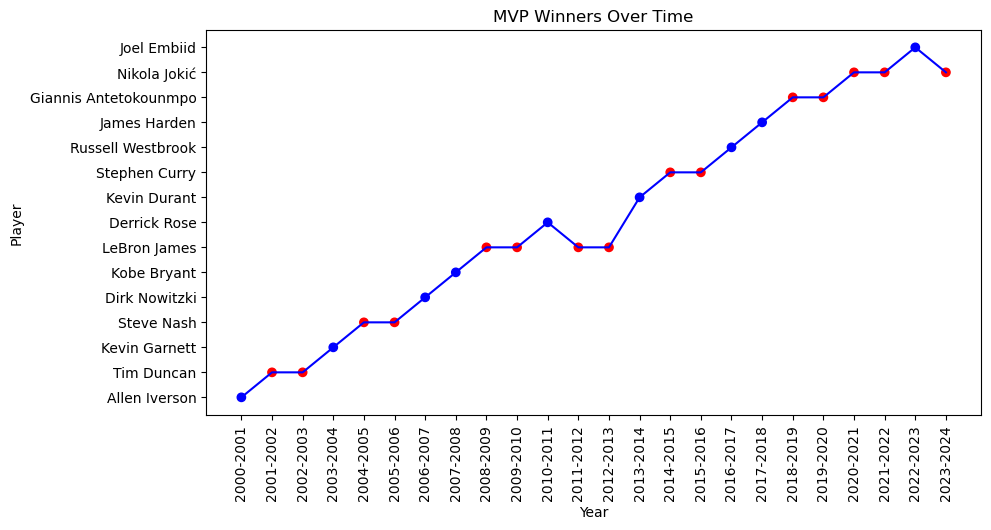

In [557]:
multi_mvp_players = mvp_count[mvp_count > 1].index

# Assign colors: blue for all, red for multiple-time winners
colors = ["red" if player in multi_mvp_players else "blue" for player in mvp["Player"]]

# Plot the full blue line
plt.figure(figsize=(10, 5))
plt.plot(mvp["Year"], mvp["Player"], color="blue")

# Overlay red markers on multiple-time winners
plt.scatter(mvp["Year"], mvp["Player"], color=colors)

# Plot MVP Winners Over Time with Count
plt.title("MVP Winners Over Time")
plt.xlabel("Year")
plt.ylabel("Player")
plt.xticks(rotation=90)
plt.show()


MVP winners are changing over time, but not constantly. While new names appear over the years, some players dominate multiple seasons.
For example, there are stretches where LeBron James, Stephen Curry, and Nikola Jokić appear multiple times, indicating periods of dominance.

Which player has had the most MVP's throughout the years? 

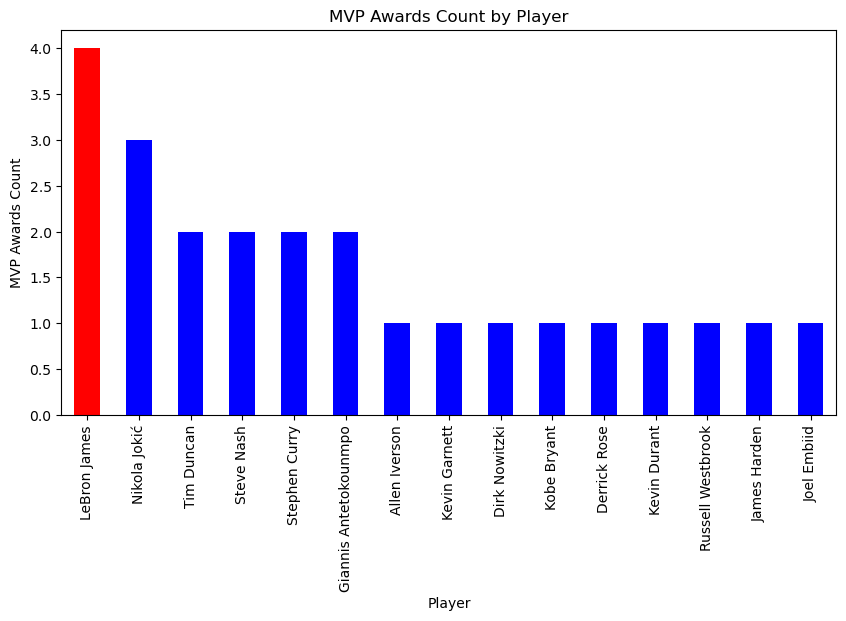

In [558]:
max_mvp = mvp_count.max()

# Assign colors: Red for the max value, blue for others
colors = ["red" if count == max_mvp else "blue"for count in mvp_count]

# Plot MVP per player
plt.figure(figsize=(10, 5))

mvp_count.plot(kind='bar', color=colors)

plt.title("MVP Awards Count by Player")
plt.xlabel("Player")
plt.ylabel("MVP Awards Count")
plt.xticks(rotation=90)
plt.show()


Lebron James has had the most MVP's throughout the years. He's the only person to have 4 MVP's!

Which team?

In [559]:
# Count MVP per Team
team_count = mvp.groupby(["Team", "Player"])["Awards"].count()

team_count.head()

Team                   Player       
Chicago Bulls          Derrick Rose     1
Cleveland Cavaliers    LeBron James     2
Dallas Mavericks       Dirk Nowitzki    1
Denver Nuggets         Nikola Jokić     3
Golden State Warriors  Stephen Curry    2
Name: Awards, dtype: int64

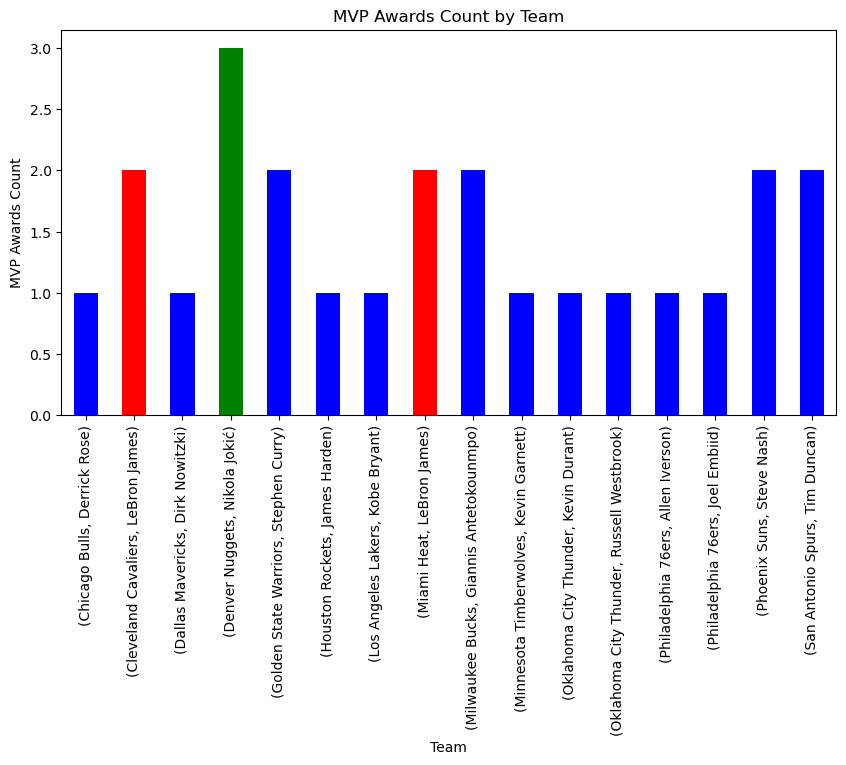

In [560]:
# Plot MVP per Team
plt.figure(figsize=(10, 5))

colors = [
    "red" if player == "LeBron James" 
    else "green" if player == "Nikola Jokić" 
    else "blue" for _, player in team_count.index]

team_count.plot(kind='bar', color=colors)

plt.title("MVP Awards Count by Team")
plt.xlabel("Team")
plt.ylabel("MVP Awards Count")
plt.show()

Although LeBron James has the highest total number of MVP awards (4), these are split between two teams: the Cleveland Cavaliers and the Miami Heat. As a result, the team with the most MVP awards is the Denver Nuggets, with Nikola Jokić earning all 3!


Why has these players won MVP compared to the other Top 4 players? 

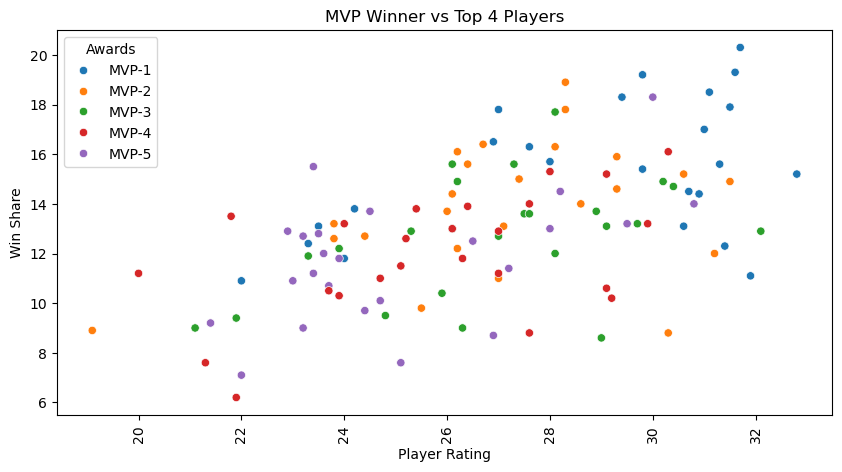

In [561]:
# Plot MVP winner vs Top 4
plt.figure(figsize=(10,5))
sns.scatterplot(data=player_df, x="Player Rating", y="Win Shares", hue="Awards")

plt.title("MVP Winner vs Top 4 Players")
plt.xlabel("Player Rating")
plt.ylabel("Win Share")
plt.xticks(rotation=90)
plt.show()



MVP winners have higher player ratings and win shares compared to the other top 4 candidates, indicating superior individual performance and greater contributions to team success.

Does the MVP winner throughout the years have a better or worst team?

In [563]:
df2 = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/team_stats/merge2000-2024.csv")

team_df = pd.DataFrame(df2)[["Year", "Team", "W", "L", "W/L%", "NRtg"]]

team_df = team_df.rename(columns={"W":"Win", "L":"Loss", "W/L%" : "Win/Loss%", "NRtg":"Net Rating"})

team_df = team_df.sort_values(by="Year")

team_df = team_df.dropna()

team_df

,Year,Team,Win,Loss,Win/Loss%,Net Rating
252,2000-2001,Miami Heat,50,32,0.610,2.49
264,2000-2001,New Jersey Nets,26,56,0.317,-5.63
261,2000-2001,Boston Celtics,36,46,0.439,-2.39
265,2000-2001,Atlanta Hawks,25,57,0.305,-5.66
266,2000-2001,Washington Wizards,19,63,0.232,-7.21
...,...,...,...,...,...,...
466,2023-2024,Los Angeles Lakers,47,35,0.573,0.47
464,2023-2024,Houston Rockets,41,41,0.500,1.12
463,2023-2024,Orlando Magic,47,35,0.573,2.10
470,2023-2024,Utah Jazz,31,51,0.378,-5.01


Win/Loss%: The percentage of games a team has won. (Total Wins/Total Games Played)

Net Rating: A positive Net Rating indicates a team is outscoring opponents per 100 possessions. A negative Net Rating usually indicates a losing team, as they are giving up more points than they generate. 

In [564]:
# Merge MVP and Team dataset
mvp_team = pd.merge(mvp, team_df, on=["Year", "Team"], how="left")

mvp_team.head()

,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards,Win,Loss,Win/Loss%,Net Rating
0,2000-2001,Allen Iverson,Philadelphia 76ers,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1,56,26,0.683,4.63
1,2001-2002,Tim Duncan,San Antonio Spurs,27.0,0.576,18.0,18.3,1.0,4.3,29.0,17.8,MVP-1,58,24,0.707,6.97
2,2002-2003,Tim Duncan,San Antonio Spurs,26.9,0.564,19.0,19.5,0.9,5.2,28.0,16.5,MVP-1,60,22,0.732,5.96
3,2003-2004,Kevin Garnett,Minnesota Timberwolves,29.4,0.547,20.1,24.4,2.0,4.0,29.6,18.3,MVP-1,58,24,0.707,6.23
4,2004-2005,Steve Nash,Phoenix Suns,22.0,0.606,5.2,49.2,1.4,0.2,20.5,10.9,MVP-1,62,20,0.756,7.49


In [565]:
# League yearly average of win/loss and net rating
league_avg =  team_df.groupby("Year")[["Win/Loss%", "Net Rating"]].mean().reset_index()

league_avg = league_avg.rename(columns={"Win/Loss%":"League Win/Loss%", "Net Rating":"League Net Rating"})

league_avg.head()

,Year,League Win/Loss%,League Net Rating
0,2000-2001,0.499966,-3.448276e-04
1,2001-2002,0.500000,6.896552e-04
2,2002-2003,0.500000,-6.125368e-17
3,2003-2004,0.499931,-3.448276e-04
4,2004-2005,0.500100,-6.666667e-04


In [566]:
# Merge MVP Team Stats with League Average Stats
mvp_stats = pd.merge(mvp_team, league_avg, on="Year", how="outer")

mvp_stats.head()

,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards,Win,Loss,Win/Loss%,Net Rating,League Win/Loss%,League Net Rating
0,2000-2001,Allen Iverson,Philadelphia 76ers,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1,56,26,0.683,4.63,0.499966,-3.448276e-04
1,2001-2002,Tim Duncan,San Antonio Spurs,27.0,0.576,18.0,18.3,1.0,4.3,29.0,17.8,MVP-1,58,24,0.707,6.97,0.500000,6.896552e-04
2,2002-2003,Tim Duncan,San Antonio Spurs,26.9,0.564,19.0,19.5,0.9,5.2,28.0,16.5,MVP-1,60,22,0.732,5.96,0.500000,-6.125368e-17
3,2003-2004,Kevin Garnett,Minnesota Timberwolves,29.4,0.547,20.1,24.4,2.0,4.0,29.6,18.3,MVP-1,58,24,0.707,6.23,0.499931,-3.448276e-04
4,2004-2005,Steve Nash,Phoenix Suns,22.0,0.606,5.2,49.2,1.4,0.2,20.5,10.9,MVP-1,62,20,0.756,7.49,0.500100,-6.666667e-04


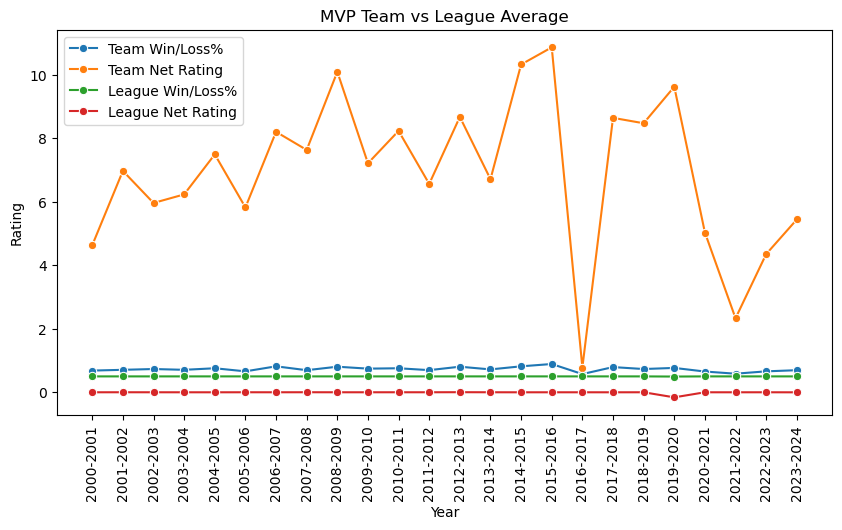

In [567]:
# Plot MVP Team and League Average Stats each year
plt.figure(figsize=(10, 5))

sns.lineplot(data=mvp_stats, x="Year", y="Win/Loss%",label="Team Win/Loss%", marker="o")
sns.lineplot(data=mvp_stats, x="Year", y="Net Rating",label="Team Net Rating", marker="o")
sns.lineplot(data=mvp_stats, x="Year", y="League Win/Loss%",label="League Win/Loss%", marker="o")
sns.lineplot(data=mvp_stats, x="Year", y="League Net Rating",label="League Net Rating", marker="o")

plt.title("MVP Team vs League Average")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

The MVP team throughtout the years definitely  has a better team. They are performing better than the league average in both Win/Loss percentage and Net Rating. This indicates that the MVP team wins a higher proportion of its games and performs better than other teams in the league. 

Does the MVP winner have a better team than the other Top 4 players?

In [568]:
player_team = pd.merge(player_df, team_df, on=["Year", "Team"], how="left")

player_team.head()

,Year,Player,Team,Player Rating,Shooting%,Rebound%,Assist%,Steal%,Block%,Usage%,Win Shares,Awards,Win,Loss,Win/Loss%,Net Rating
0,2000-2001,Allen Iverson,Philadelphia 76ers,24.0,0.518,5.2,23.0,3.2,0.5,35.9,11.8,MVP-1,56.0,26.0,0.683,4.63
1,2000-2001,Tim Duncan,San Antonio Spurs,23.8,0.536,17.8,15.3,1.2,4.2,28.7,13.2,MVP-2,58.0,24.0,0.707,8.72
2,2000-2001,Shaquille O'Neal,Los Angeles Lakers,30.2,0.574,18.1,18.8,0.8,4.9,31.6,14.9,MVP-3,56.0,26.0,0.683,3.59
3,2000-2001,Chris Webber,Sacramento Kings,24.7,0.516,14.8,20.6,1.7,2.8,31.6,11.0,MVP-4,55.0,27.0,0.671,6.08
4,2000-2001,Kevin Garnett,Minnesota Timberwolves,23.9,0.531,16.4,21.8,1.8,3.2,27.0,11.8,MVP-5,47.0,35.0,0.573,1.61


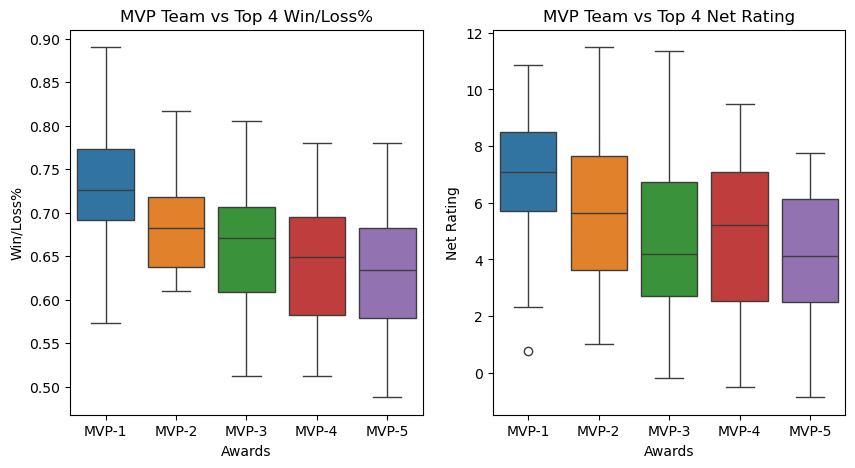

In [569]:
# Plot the comparison bewteen MVP Team & Top 4 team stats
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=player_team, x="Awards", y="Win/Loss%", hue="Awards")
plt.title("MVP Team vs Top 4 Win/Loss%")

plt.subplot(1, 2, 2)
sns.boxplot(data=player_team, x="Awards", y="Net Rating", hue="Awards")
plt.title("MVP Team vs Top 4 Net Rating")

plt.show()

The MVP team has a better team than the other 4 players. They consistently outperforms the top four players teams in both Win/Loss percentage and Net Rating. This indicates that MVP winners are often on stronger teams. 